# ボストンのデータセットを利用した回帰を実装

## ボストンのデータセット：
入力されるデータのキーは次の意味を持つ

name|description
---|---
CRIM|犯罪発生率
ZN|住居区画の密集度
INDUS|非小売業の土地割合
CHAS|チャールズ川 (1: 川の周辺, 0: それ以外)
NOX|NOx濃度
RM|住居の平均部屋数
AGE|1940年より前に建てられた物件割合
DIS|5つのボストン市の雇用施設からの重み付き距離
RAD|大きな道路へのアクセスしやすさ
TAX|$10,000ドルあたりの所得税率
PTRATIO|教師あたりの生徒数
B|黒人の比率 1000(Bk – 0.63)^2
LSTAT|低所得者の割合

In [15]:
from sklearn.datasets import  load_boston
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

datasets = load_boston()
dfData= pd.DataFrame(datasets.data,columns=datasets.feature_names)
dfData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
dfData["PRICE"] = datasets.target
dfData.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


<AxesSubplot:>

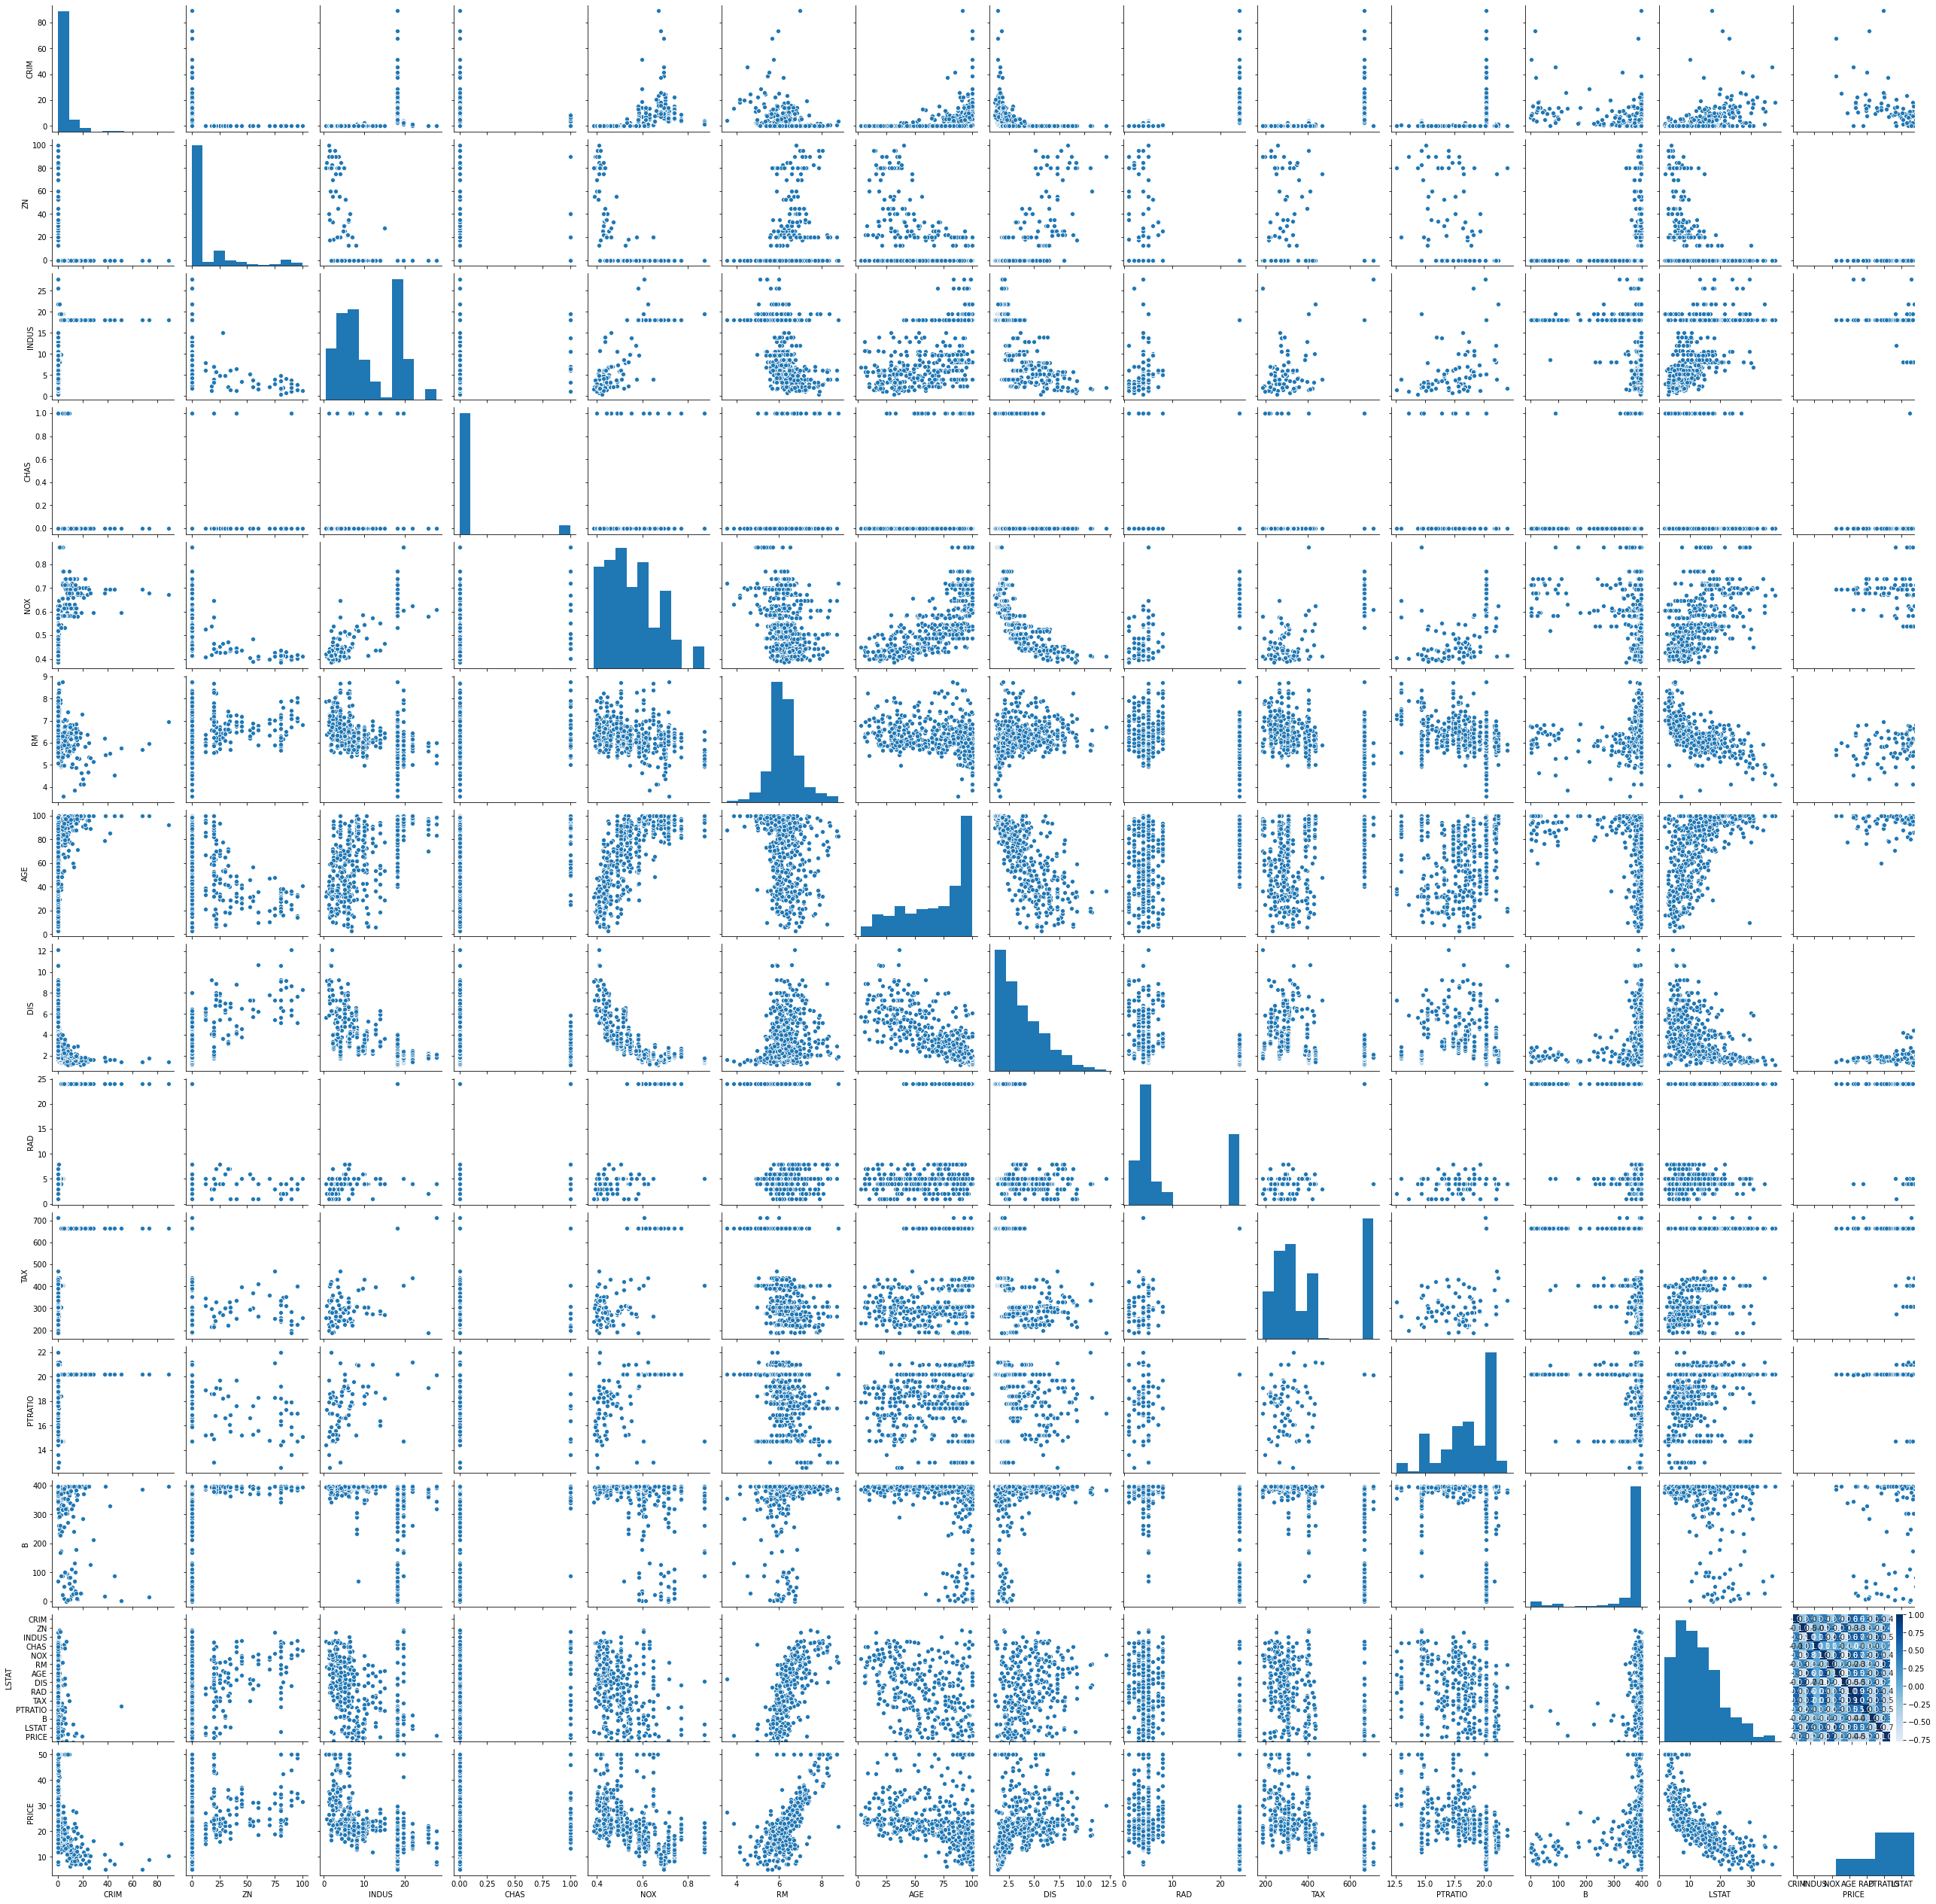

In [17]:
#seabornのデータの可視化

sns.pairplot(dfData)
#ヒートマップで可視化
heat_map = dfData.corr(method="pearson")
sns.heatmap(heat_map,center=0,annot=True, cmap="Blues",fmt="1.1f")

In [18]:
dfData.corr().style.background_gradient(axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


以上の相関係数の一覧より、住宅街の金額との相関が最も高いのは、***LSTAT（低所得者の割合）***である。

この低所得者の割合をもとに。住宅価値を算出してみる。

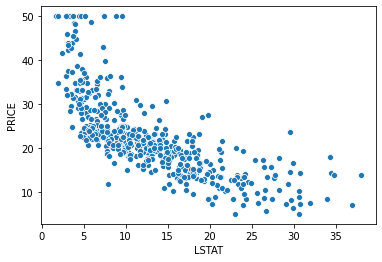

In [21]:
sns.scatterplot(x='LSTAT', y='PRICE', data=dfData)
plt.show()

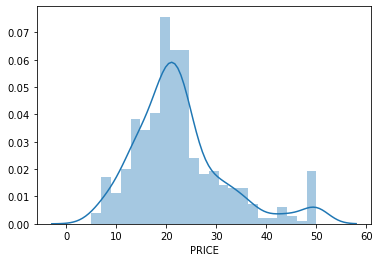

In [20]:
sns.distplot(dfData['PRICE'])
plt.show()

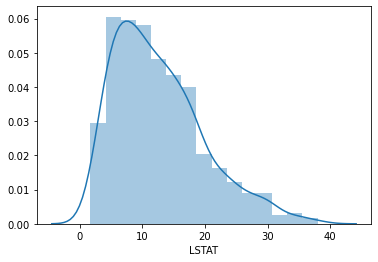

In [22]:
sns.distplot(dfData['LSTAT'])
plt.show()

In [64]:
# 以下で、KFold,学習機ライブラリの読み込みを行っている

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [85]:
x = dfData["LSTAT"].values
y = dfData["PRICE"].values

In [126]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,shuffle=True,random_state=1)

In [127]:
svm =SVR()
svm.fit(xTrain.reshape(-1, 1),yTrain.reshape(-1, 1))

c:\users\0622o\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [128]:
predictedValue = svm.predict(xTest.reshape(-1, 1))

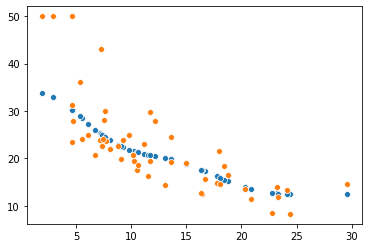

In [129]:
sns.scatterplot(xTest,predictedValue)
sns.scatterplot(xTest,yTest)
plt.show()

### SVM(サポートベクトルマシーン)
- パラメータを調整したうえで予測値を求める
- GridSearchCV,KFold を利用して実装を検討を行う


In [140]:
tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
clf = GridSearchCV(
    svm, # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=5, # 交差検定の回数
     ) # モデルの評価関数の指定

clf.fit(xTrain.reshape(-1,1),yTrain.reshape(-1,1))

c:\users\0622o\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\0622o\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\0622o\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\0622o\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.001, 0.0001], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['sigmoid']}])

In [141]:
predictedValue2 = clf.predict(xTest.reshape(-1,1))
predictedValue2

array([25.52645751, 26.11748318, 15.84581291, 24.62788883, 21.92931004,
       20.97931938, 31.26937096, 19.37322968, 16.35356723, 23.61229609,
       25.18638751, 31.49092599, 18.96583574, 21.87477813, 20.43183359,
       20.0833192 , 13.13611748, 31.44146852, 25.69219316,  9.88686446,
       20.62715745, 17.08221844, 22.99848235, 28.10352208, 31.34293615,
       12.41804651, 14.93484541, 21.56653018, 25.97967104, 14.62537353,
       29.43320464, 16.04278147, 36.26884934, 17.20361771, 23.24127285,
       18.97971221, 16.42812951, 29.78960924, 13.07325901, 18.07281732,
       25.84348249, 26.88663964, 25.41190825, 12.59771889, 16.29041513,
       13.45060765, 39.36547962, 17.25582264, 22.35766161, 21.463331  ,
       20.48450624])

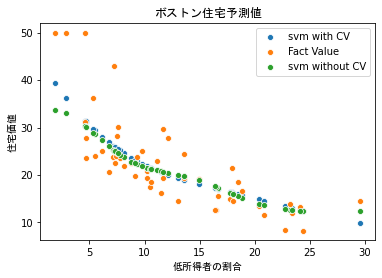

In [156]:
sns.scatterplot(xTest,predictedValue2,label="svm with CV")
sns.scatterplot(xTest,yTest,label="Fact Value")
sns.scatterplot(xTest,predictedValue,label="svm without CV")

plt.title("ボストン住宅予測値",fontname="MS Gothic")
plt.xlabel("低所得者の割合",fontname="MS Gothic")
plt.ylabel("住宅価値",fontname="MS Gothic")
plt.show()

### 結果：
- 低所得者の割合が低いほど住宅価値は高い
- 負の相関があれば、因果は逆転していると考えるべき
- LSTAT 値を比較しても、結果はあまり変わってない